In [19]:
# Input voice and convert to log_mel_spec and do a forward pass into 

from tensorflow.keras.models import load_model
import librosa
import numpy as np
import os

model = load_model('insert.keras')


# If audio is longer than 174, maybe split into multiple and classify it differently
MAX_LEN = 174






In [30]:
audio_path = os.path.join(os.getcwd(), 'test.wav')


audio_path

'/Users/chow/Coding/Emotion_Detector/test.wav'

In [31]:
waveform, sr = librosa.load(audio_path, sr = 22050)

In [32]:
# Converting to mel_spec
mel_spec = librosa.feature.melspectrogram(y = waveform, sr = sr, n_mels = 128)
log_mel_spec = librosa.power_to_db(mel_spec, ref = np.max)
    
    # Padding and truncating 
if log_mel_spec.shape[1] < MAX_LEN:
 
    pad_width = MAX_LEN - log_mel_spec.shape[1]
    log_mel_spec = np.pad(log_mel_spec, pad_width = ((0, 0), (0, pad_width)), mode = 'constant')
else:
    
    log_mel_spec = log_mel_spec[:, :MAX_LEN]


# This needs to be differently altered depending on the model used
log_mel_spec = log_mel_spec[..., np.newaxis] # Adding a channel
log_mel_spec = log_mel_spec[np.newaxis, ...]



In [33]:
pred_voice = model.predict(log_mel_spec)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [34]:


print(pred_voice)


# 0 is ang
# 4 is neu
# 1 is Dis
# 5 is sad
# 2 is Fea
# 3 is happy

{
  "0": "anger",
  "1": "disgust",
  "2": "fear",
  "3": "happy",
  "4": "neutral",
  "5": "sad"
}

[[0. 0. 1. 0. 0. 0.]]


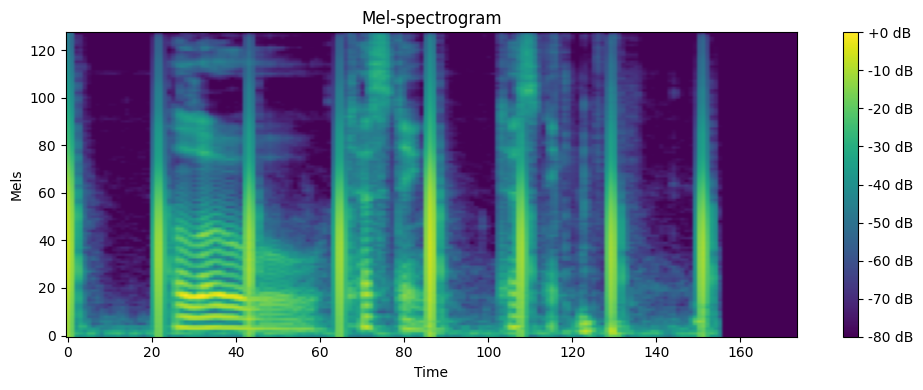